In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances, silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer

from sklearn import set_config
set_config(transform_output="pandas")

In [2]:
# Path of my CSV file
file_path = "your path"

# Use Pandas read_csv function to read the CSV file and store the data in a DataFrame
moosic_df = pd.read_csv(file_path)

moosic_df.head()

Unnamed: 0  \
0           0   
1           1   
2           2   
3           3   
4           4   

  name                                                                                                                                                                               \
0  Se Eu Quiser Falar Com Deus                   ...                                                                                                                                  
1  Saudade De Bahia                              ...                                                                                                                                  
2  Canta Canta, Minha Gente                      ...                                                                                                                                  
3  Mulher Eu Sei                                 ...                                                                                                                                  
4  Rosa Morena                                   ...                                                                                                                                  

   artist                                            danceability   energy     \
0  Gilberto Gil                                              0.658     0.2590   
1  Antônio Carlos Jobim                                      0.742     0.3990   
2  Martinho Da Vila                                          0.851     0.7300   
3  Chico César                                               0.705     0.0502   
4  Kurt Elling                                               0.651     0.1190   

   key   loudness   mode   speechiness   acousticness   instrumentalness   \
0    11    -13.141      0        0.0705          0.694           0.000059   
1     2    -12.646      1        0.0346          0.217           0.000002   
2     2    -11.048      1        0.3470          0.453           0.000063   
3     4    -18.115      1        0.0471          0.879           0.000041   
4     6    -19.807      1        0.0380          0.916           0.000343   

   liveness   valence   tempo     type   duration_ms   time_signature   \
0      0.975     0.306   110.376               256213                4   
1      0.107     0.693   125.039               191867                4   
2      0.124     0.905    93.698               152267                4   
3      0.386     0.524   106.802               186227                4   
4      0.104     0.402   120.941               273680                4   

   id                                                                    html  
0  1n7JnwviZ7zf0LR1tcGFq7   https://open.spotify.com/track/1n7JnwviZ7zf0LR...  
1  5QGM1U0eCYrQuwSJwTm5Zq   https://open.spotify.com/track/5QGM1U0eCYrQuwS...  
2  0NLIFSZxPzQhCwnkn5PJYs   https://open.spotify.com/track/0NLIFSZxPzQhCwn...  
3  3mXqOdlLE1k67WsAxryPFs   https://open.spotify.com/track/3mXqOdlLE1k67Ws...  
4  7bSzjzjTkWT2CkIPPdp0eA   https://open.spotify.com/track/7bSzjzjTkWT2CkI...

In [3]:
# Display the names of the columns present in the DataFrame
print(moosic_df.columns)

Index(['Unnamed: 0',
       'name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'type ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')


In [4]:
# Remove extra spaces in column names
moosic_df.columns = moosic_df.columns.str.strip()

In [5]:
# Count how many missing values are there
missing_values = moosic_df.isna().sum()
missing_values

Unnamed: 0          0
name                0
artist              0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
duration_ms         0
time_signature      0
id                  0
html                0
dtype: int64

In [6]:
# Add a new columns 'name_artist'
moosic_df['name_artist'] = moosic_df['name'] + ' - ' + moosic_df['artist']

In [7]:
# Display the names of the columns present in the DataFrame
print(moosic_df.columns)

Index(['Unnamed: 0', 'name', 'artist', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'duration_ms', 'time_signature',
       'id', 'html', 'name_artist'],
      dtype='object')


In [8]:
# Remove extra spaces in column names
moosic_df.columns = moosic_df.columns.str.strip()

# Add a new 'count' column with the repetition count
moosic_df['count_name_artist'] = moosic_df.groupby('name_artist')['name_artist'].transform('count')
moosic_df['count_id'] = moosic_df.groupby('id')['id'].transform('count')

moosic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5235 non-null   int64  
 1   name               5235 non-null   object 
 2   artist             5235 non-null   object 
 3   danceability       5235 non-null   float64
 4   energy             5235 non-null   float64
 5   key                5235 non-null   int64  
 6   loudness           5235 non-null   float64
 7   mode               5235 non-null   int64  
 8   speechiness        5235 non-null   float64
 9   acousticness       5235 non-null   float64
 10  instrumentalness   5235 non-null   float64
 11  liveness           5235 non-null   float64
 12  valence            5235 non-null   float64
 13  tempo              5235 non-null   float64
 14  type               5235 non-null   object 
 15  duration_ms        5235 non-null   int64  
 16  time_signature     5235 

In [9]:
moosic_df.duplicated().sum()

0

In [10]:
pd.set_option('display.max_rows', None)

duplicates_mask = moosic_df.duplicated(subset=['id'], keep=False)

# Filter the DataFrame to show only duplicate rows
duplicated_rows = moosic_df[duplicates_mask]

# Delete duplicate rows based on "id" column
moosic_df_no_duplicates_id = moosic_df.drop_duplicates(subset=['id'], keep='first')

duplicates_mask_1 = moosic_df_no_duplicates_id.duplicated(subset=['name_artist'], keep=False)

# Filter the DataFrame to show only duplicate rows
duplicated_rows_1 = moosic_df_no_duplicates_id[duplicates_mask_1]

# Delete duplicate rows based on 'name_artist' column
# The name would be: moosic_df_no_duplicates_name_artist but to make it shorter, I named it "final_moosic_df"
final_moosic_df = moosic_df_no_duplicates_id.drop_duplicates(subset=['name_artist'], keep='first')

final_moosic_df.set_index("name_artist", inplace=True)

final_moosic_df = final_moosic_df.drop(['Unnamed: 0', "name", "artist", 'type', "id", "html", "count_name_artist", "count_id"], axis=1)
final_moosic_df.head()

danceability  energy  key  \
name_artist                                                                     
Se Eu Quiser Falar Com Deus                    ...         0.658  0.2590   11   
Saudade De Bahia                               ...         0.742  0.3990    2   
Canta Canta, Minha Gente                       ...         0.851  0.7300    2   
Mulher Eu Sei                                  ...         0.705  0.0502    4   
Rosa Morena                                    ...         0.651  0.1190    6   

                                                    loudness  mode  \
name_artist                                                          
Se Eu Quiser Falar Com Deus                    ...   -13.141     0   
Saudade De Bahia                               ...   -12.646     1   
Canta Canta, Minha Gente                       ...   -11.048     1   
Mulher Eu Sei                                  ...   -18.115     1   
Rosa Morena                                    ...   -19.807     1   

                                                    speechiness  acousticness  \
name_artist                                                                     
Se Eu Quiser Falar Com Deus                    ...       0.0705         0.694   
Saudade De Bahia                               ...       0.0346         0.217   
Canta Canta, Minha Gente                       ...       0.3470         0.453   
Mulher Eu Sei                                  ...       0.0471         0.879   
Rosa Morena                                    ...       0.0380         0.916   

                                                    instrumentalness  \
name_artist                                                            
Se Eu Quiser Falar Com Deus                    ...          0.000059   
Saudade De Bahia                               ...          0.000002   
Canta Canta, Minha Gente                       ...          0.000063   
Mulher Eu Sei                                  ...          0.000041   
Rosa Morena                                    ...          0.000343   

                                                    liveness  valence  \
name_artist                                                             
Se Eu Quiser Falar Com Deus                    ...     0.975    0.306   
Saudade De Bahia                               ...     0.107    0.693   
Canta Canta, Minha Gente                       ...     0.124    0.905   
Mulher Eu Sei                                  ...     0.386    0.524   
Rosa Morena                                    ...     0.104    0.402   

                                                      tempo  duration_ms  \
name_artist                                                                
Se Eu Quiser Falar Com Deus                    ...  110.376       256213   
Saudade De Bahia                               ...  125.039       191867   
Canta Canta, Minha Gente                       ...   93.698       152267   
Mulher Eu Sei                                  ...  106.802       186227   
Rosa Morena                                    ...  120.941       273680   

                                                    time_signature  
name_artist                                                         
Se Eu Quiser Falar Com Deus                    ...               4  
Saudade De Bahia                               ...               4  
Canta Canta, Minha Gente                       ...               4  
Mulher Eu Sei                                  ...               4  
Rosa Morena                                    ...               4

In [11]:
final_moosic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5114 entries, Se Eu Quiser Falar Com Deus                                                                                                                                                       - Gilberto Gil                                     to Ravel: Boléro, M. 81                                                                                                                                                            - Maurice Ravel                                   
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5114 non-null   float64
 1   energy            5114 non-null   float64
 2   key               5114 non-null   int64  
 3   loudness          5114 non-null   float64
 4   mode              5114 non-null   int64  
 5   speechiness       5114 non-null   float64
 6   acousticness      5114 non-null   float64
 7   instrumentalness  511

### Analyze the correlation between features

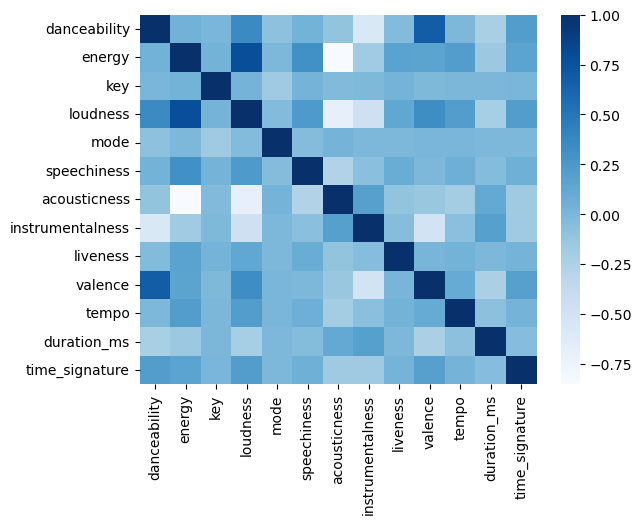

In [12]:
# The correlations between features
def correlation(final_moosic_df):
    columns_lst = final_moosic_df.columns.to_list()
    corr_dict = {column:[] for column in columns_lst}

    for key in corr_dict: 
        for column in columns_lst:
            corr_dict[key].append(final_moosic_df[key].corr(final_moosic_df[column]))
    corr_df = pd.DataFrame(corr_dict, 
                           index = corr_dict.keys()
                          )
    
    return corr_df

corr_df = correlation(final_moosic_df)

# Generate a heatmap of correlation
sns.heatmap(corr_df, cmap="Blues");

# Scaling data

##### MinMax Scaling and Standard Scaler were tested, but the results were quite similar, thus MinMax Scaling was chosen to create clusters

## MinMaxScaler

In [13]:
min_max_scaler = MinMaxScaler()
scaled_features_df = min_max_scaler.fit_transform(final_moosic_df)

scaled_features_df = pd.DataFrame(scaled_features_df,
                            index=final_moosic_df.index,
                            columns=final_moosic_df.columns)

#### Histograms with rescaled measurements

C:\Users\Helene\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


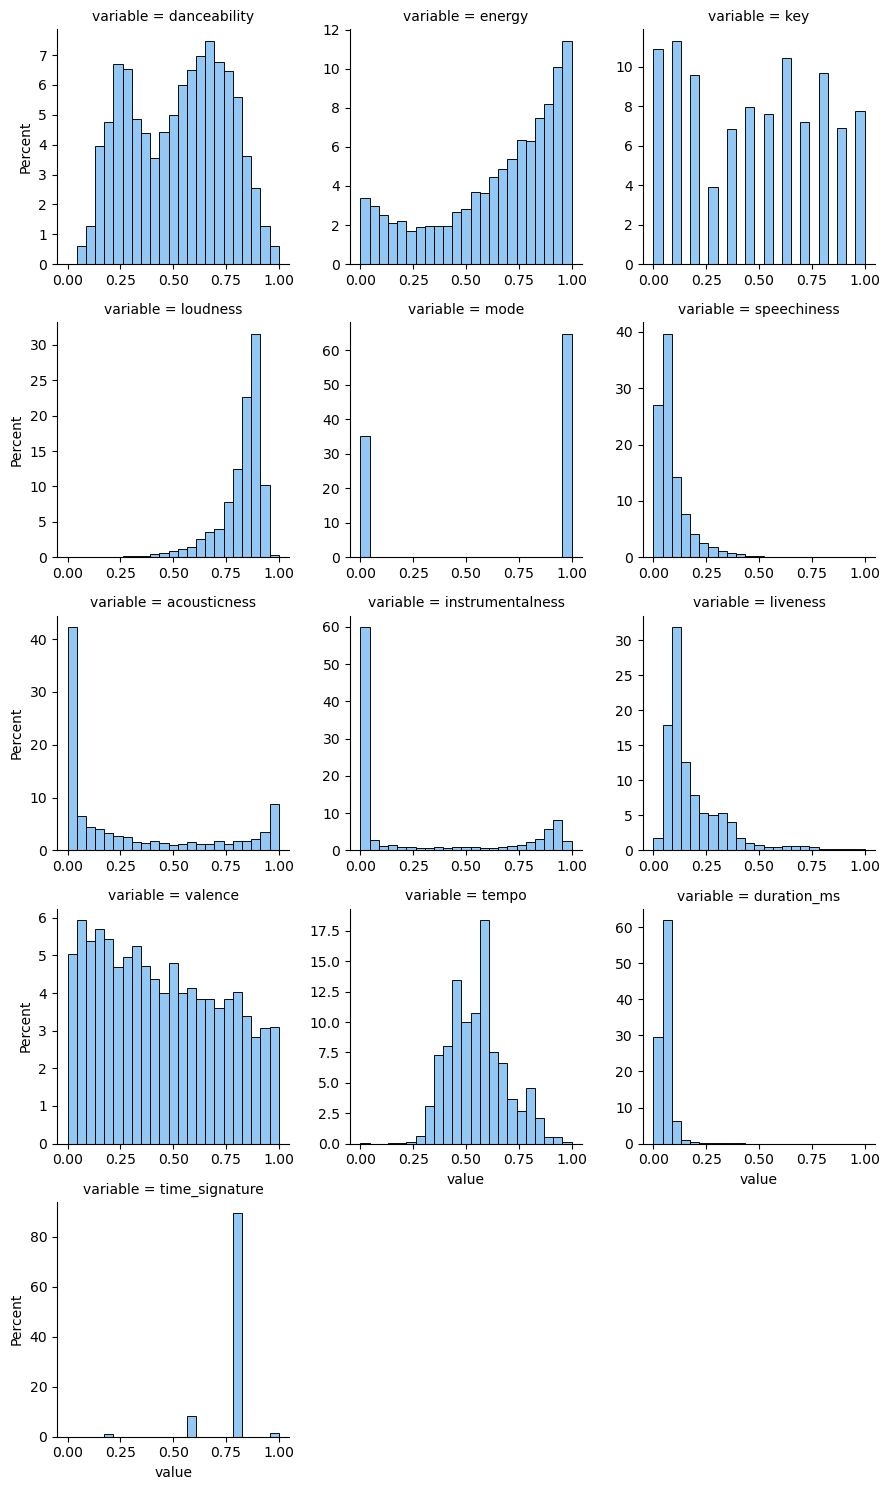

In [14]:
sns.displot(
    data=pd.melt(scaled_features_df, ignore_index=False),
    x='value',
    col='variable',
    stat='percent',
    bins=23,
    facet_kws={'sharex': False, 'sharey': False},
    common_bins=False,
    common_norm=False,
    col_wrap=3,
    height=3,
    color='#70B6F1' 
);

## PCA - Principal Component Analysis

##### PCA is used to evaluate and determine the combination between features and keep only the most relevant ones

In [15]:
# Initialise the PCA object
pca = PCA()

# Fit the PCA object to the data
pca.fit(scaled_features_df)

# Transform scaled_features_df based on the fit calculations
pca_df = pca.transform(scaled_features_df)

pca_df.head(2)

pca0      pca1  \
name_artist                                                              
Se Eu Quiser Falar Com Deus                    ... -0.064537  0.758072   
Saudade De Bahia                               ... -0.037953 -0.455957   

                                                        pca2      pca3  \
name_artist                                                              
Se Eu Quiser Falar Com Deus                    ... -0.517235  0.434502   
Saudade De Bahia                               ... -0.383397 -0.227133   

                                                        pca4      pca5  \
name_artist                                                              
Se Eu Quiser Falar Com Deus                    ... -0.251413  0.565616   
Saudade De Bahia                               ...  0.084413 -0.173156   

                                                        pca6      pca7  \
name_artist                                                              
Se Eu Quiser Falar Com Deus                    ...  0.548255  0.196826   
Saudade De Bahia                               ...  0.039868  0.109775   

                                                        pca8      pca9  \
name_artist                                                              
Se Eu Quiser Falar Com Deus                    ...  0.107165 -0.021090   
Saudade De Bahia                               ...  0.177213 -0.012999   

                                                       pca10     pca11  \
name_artist                                                              
Se Eu Quiser Falar Com Deus                    ... -0.013466 -0.006173   
Saudade De Bahia                               ... -0.016394  0.014335   

                                                       pca12  
name_artist                                                   
Se Eu Quiser Falar Com Deus                    ... -0.006703  
Saudade De Bahia                               ... -0.012158

### Evaluate the most informative principal components in the model

In [16]:
# Get the variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.27948734, 0.26104909, 0.18466074, 0.11375255, 0.06083312,
       0.02761468, 0.02269717, 0.01776467, 0.01494553, 0.00741075,
       0.00590256, 0.0025252 , 0.0013566 ])

### Elbow method 

##### Visualization of the proportion of variance for each principal component

C:\Users\Helene\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Helene\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


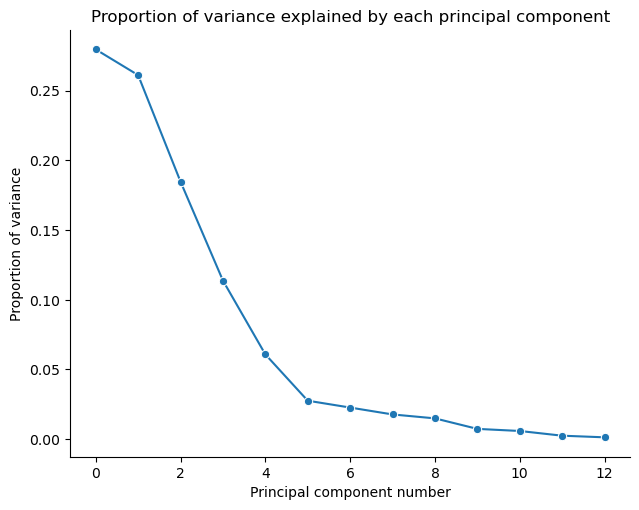

In [17]:
# Create a Pandas DataFrame from the variance explained array
explained_variance_df = pd.DataFrame(explained_variance, columns=["Variance explained"])

# Add a column for the principal component index
explained_variance_df["Principal component index"] = range(len(explained_variance))

(
# Create a line chart with sns.relplot
sns.relplot(
    kind='line',
    data=explained_variance_df,
    x="Principal component index",
    y="Variance explained",
    marker='o',
    aspect=1.3)
    
# Set the title of the plot
.set(title="Proportion of variance explained by each principal component")
    
# Set the axis labels
.set_axis_labels("Principal component number", "Proportion of variance")
);

In [18]:
# Set the variable elbow to where you believe the elbow is
elbow = 10

# Create a PCA object with {elbow} principal components(PC) and add 1 since the PC start at 0 and not 1
pca_elbow = PCA(n_components=elbow + 1)

# Fit the PCA object to the scaled features dataframe and transform it
pca_elbow_df = pca_elbow.fit_transform(pca_df)

pca_elbow_df=pd.DataFrame(pca_elbow_df)

pca_elbow_df.head(2)

pca0      pca1  \
name_artist                                                              
Se Eu Quiser Falar Com Deus                    ... -0.064537  0.758072   
Saudade De Bahia                               ... -0.037953 -0.455957   

                                                        pca2      pca3  \
name_artist                                                              
Se Eu Quiser Falar Com Deus                    ... -0.517235  0.434502   
Saudade De Bahia                               ... -0.383397 -0.227133   

                                                        pca4      pca5  \
name_artist                                                              
Se Eu Quiser Falar Com Deus                    ... -0.251413  0.565616   
Saudade De Bahia                               ...  0.084413 -0.173156   

                                                        pca6      pca7  \
name_artist                                                              
Se Eu Quiser Falar Com Deus                    ...  0.548255  0.196826   
Saudade De Bahia                               ...  0.039868  0.109775   

                                                        pca8      pca9  \
name_artist                                                              
Se Eu Quiser Falar Com Deus                    ...  0.107165 -0.021090   
Saudade De Bahia                               ...  0.177213 -0.012999   

                                                       pca10  
name_artist                                                   
Se Eu Quiser Falar Com Deus                    ... -0.013466  
Saudade De Bahia                               ... -0.016394

### Cumulative variances

##### To define the best PCA number we use the cumulative variation in which 95% of the variation must be explained

In [19]:
# Create a PCA object 
pca_variance = PCA(n_components=0.95)

C:\Users\Helene\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Helene\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


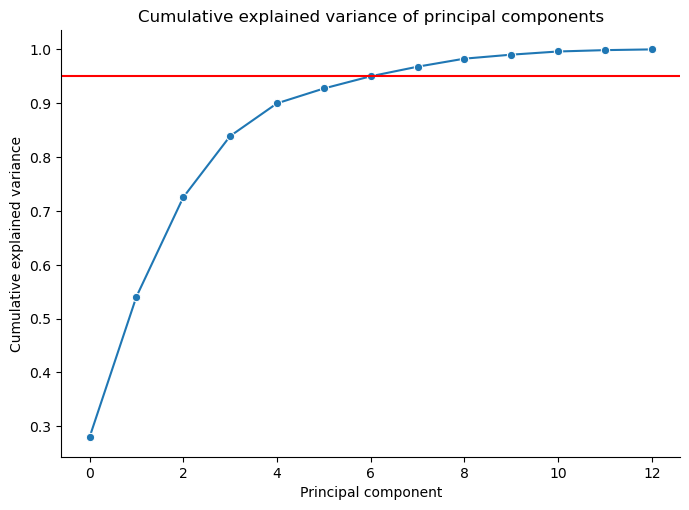

In [20]:
# Create a cumulative explained variance plot
(
sns.relplot(
    kind="line",  # Create a line plot
    x=np.arange(len(explained_variance)),  # Set the principal component index
    y=np.cumsum(explained_variance),  # Set the cumulative explained variance
    marker="o",  # Use a circle marker for the data points
    aspect=1.4,  # Set the aspect ratio of the plot 
)
# Set the title of the plot
.set(title="Cumulative explained variance of principal components")
# Set the axis labels
.set_axis_labels("Principal component", "Cumulative explained variance")
);

# Add a horizontal red line at 0.95 threshold on the y axis
plt.axhline(y=0.95, color='red');

In [21]:
# Fit the PCA object to the scaled features dataframe and transform it
pca_variance_df = pca_variance.fit_transform(pca_df)

# The dataframe now contains the principal components of the scaled features dataframe
pca_variance_df.head()

pca0      pca1  \
name_artist                                                              
Se Eu Quiser Falar Com Deus                    ... -0.064537  0.758072   
Saudade De Bahia                               ... -0.037953 -0.455957   
Canta Canta, Minha Gente                       ... -0.148934 -0.502758   
Mulher Eu Sei                                  ...  0.498394 -0.213856   
Rosa Morena                                    ...  0.536936 -0.161961   

                                                        pca2      pca3  \
name_artist                                                              
Se Eu Quiser Falar Com Deus                    ... -0.517235  0.434502   
Saudade De Bahia                               ... -0.383397 -0.227133   
Canta Canta, Minha Gente                       ... -0.470304 -0.234399   
Mulher Eu Sei                                  ... -0.809065 -0.007562   
Rosa Morena                                    ... -0.742404  0.172673   

                                                        pca4      pca5  \
name_artist                                                              
Se Eu Quiser Falar Com Deus                    ... -0.251413  0.565616   
Saudade De Bahia                               ...  0.084413 -0.173156   
Canta Canta, Minha Gente                       ...  0.277046 -0.010301   
Mulher Eu Sei                                  ... -0.071725  0.111951   
Rosa Morena                                    ... -0.148367 -0.082073   

                                                        pca6  
name_artist                                                   
Se Eu Quiser Falar Com Deus                    ...  0.548255  
Saudade De Bahia                               ...  0.039868  
Canta Canta, Minha Gente                       ...  0.040500  
Mulher Eu Sei                                  ...  0.220118  
Rosa Morena                                    ...  0.010650

##### The PCA findings indicate that 7 out of the 13 features should be kept. Nevertheless, our decision to retain all 13 features is rooted in the desire to preserve comprehensive information regarding the songs during the clustering process. our next task entails determining the optimal number of clusters for grouping the songs, for that, we used the elbow method and the silhouette scores.

# Clustering

### Elbow method

C:\Users\Helene\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Helene\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


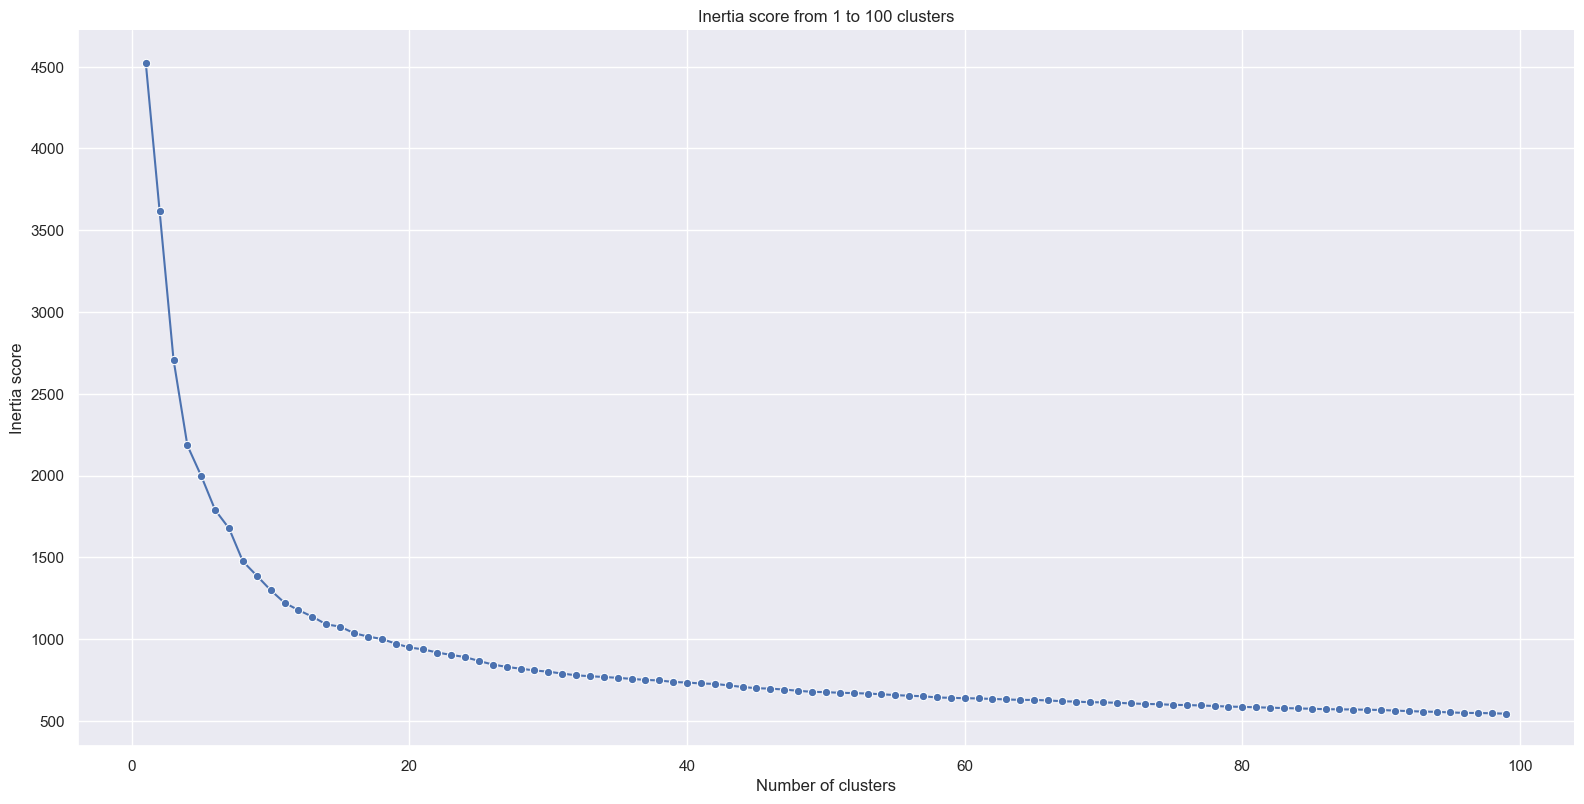

In [22]:
# Elbow method - 100 CLUSTERS - a random_state 
seed = 123

# Set the maximum number of clusters to try
max_k = 100

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for i in range(1, max_k):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters=i,
                      n_init="auto",
                      random_state = seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(scaled_features_df)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

# ELBOW METHOD - 120 CLUSTERS
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(1,max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

### Silhouette

C:\Users\Helene\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Helene\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


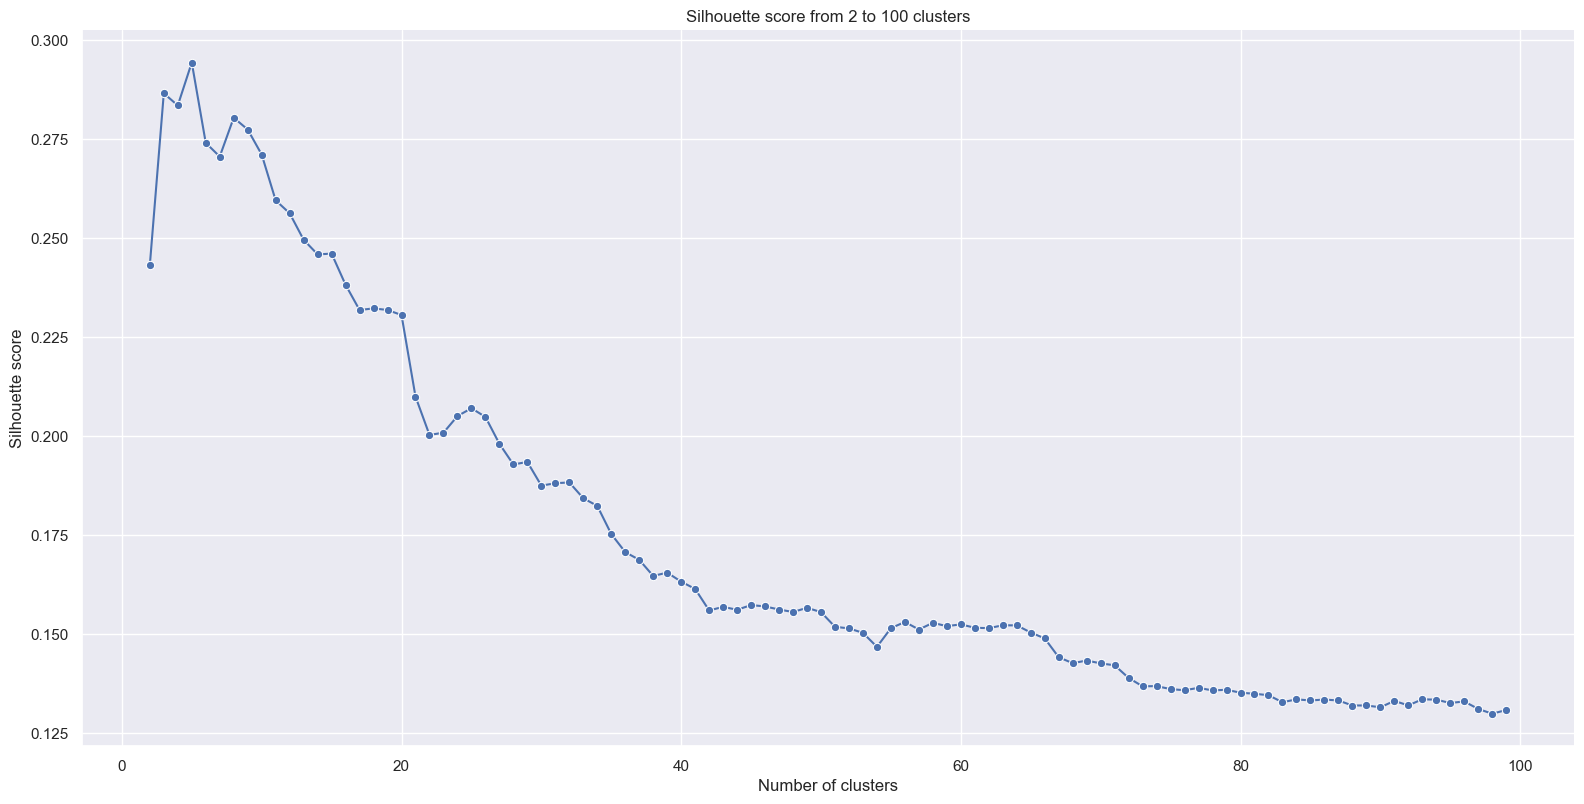

In [23]:
# SILHOUETTE - 100 CLUSTERS
# Set the maximum number of clusters to try
max_k = 100

# Create an empty list to store the silhouette scores
sil_scores = []


for j in range(2, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters=j,
                    n_init="auto",
                    random_state = seed)

    # Fit the KMeans model to the scaled data
    kmeans.fit(scaled_features_df)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    score = silhouette_score(scaled_features_df, labels)

    # Append the silhouette score to the list
    sil_scores.append(score)
    
# SILHOUETTE - 120 CLUSTERS
sns.set_theme(style='darkgrid')

(
sns.relplot(y=sil_scores,
            x=range(2,max_k),
            kind='line',
            marker='o',
            height = 8,
            aspect=2)
.set(title=f"Silhouette score from 2 to {max_k} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

#### Clustering graphs using the silhouette score

For n_clusters = 10 The average silhouette_score is : 0.2668466938555481
For n_clusters = 20 The average silhouette_score is : 0.21544029625501293
For n_clusters = 30 The average silhouette_score is : 0.19073697580472532
For n_clusters = 40 The average silhouette_score is : 0.16847773649393244
For n_clusters = 50 The average silhouette_score is : 0.14757445583941645
For n_clusters = 60 The average silhouette_score is : 0.1461337188934418
For n_clusters = 70 The average silhouette_score is : 0.13477297113064243
For n_clusters = 80 The average silhouette_score is : 0.1311869405740481
For n_clusters = 90 The average silhouette_score is : 0.12980949438392408
For n_clusters = 100 The average silhouette_score is : 0.1290262371864013


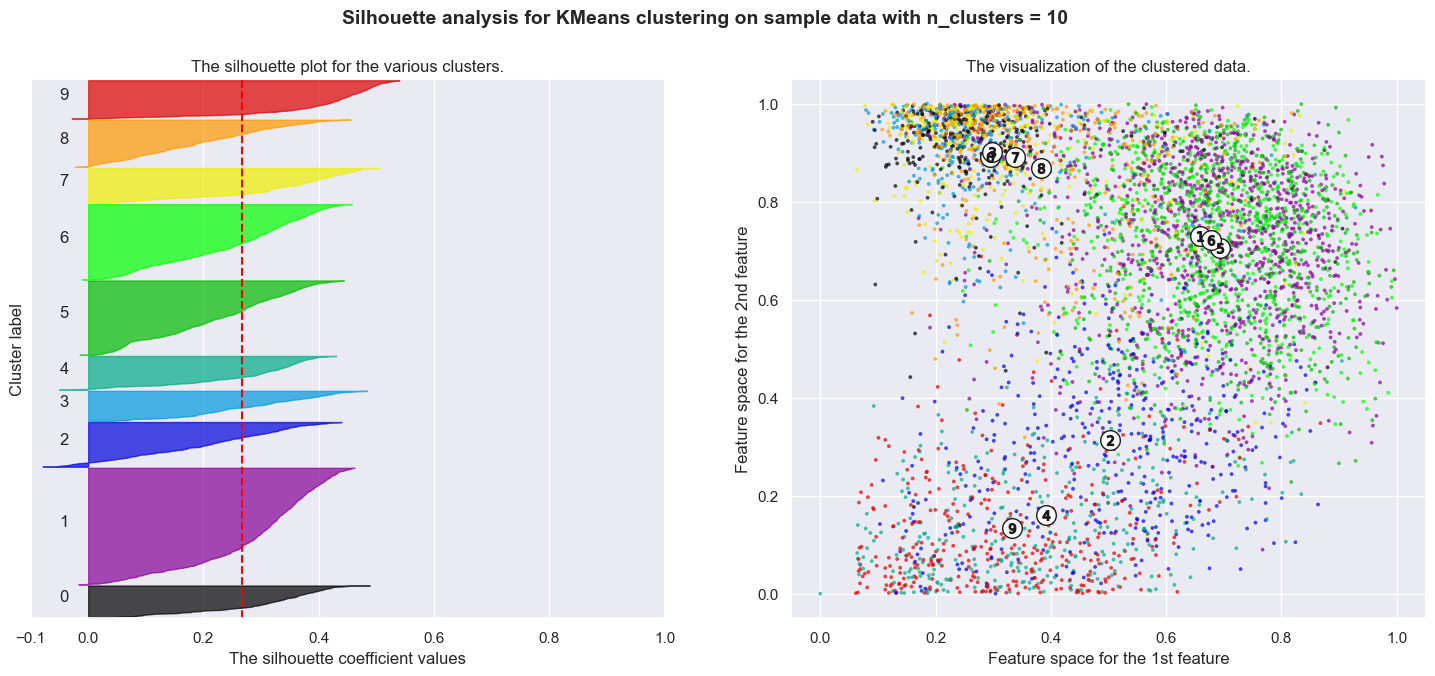

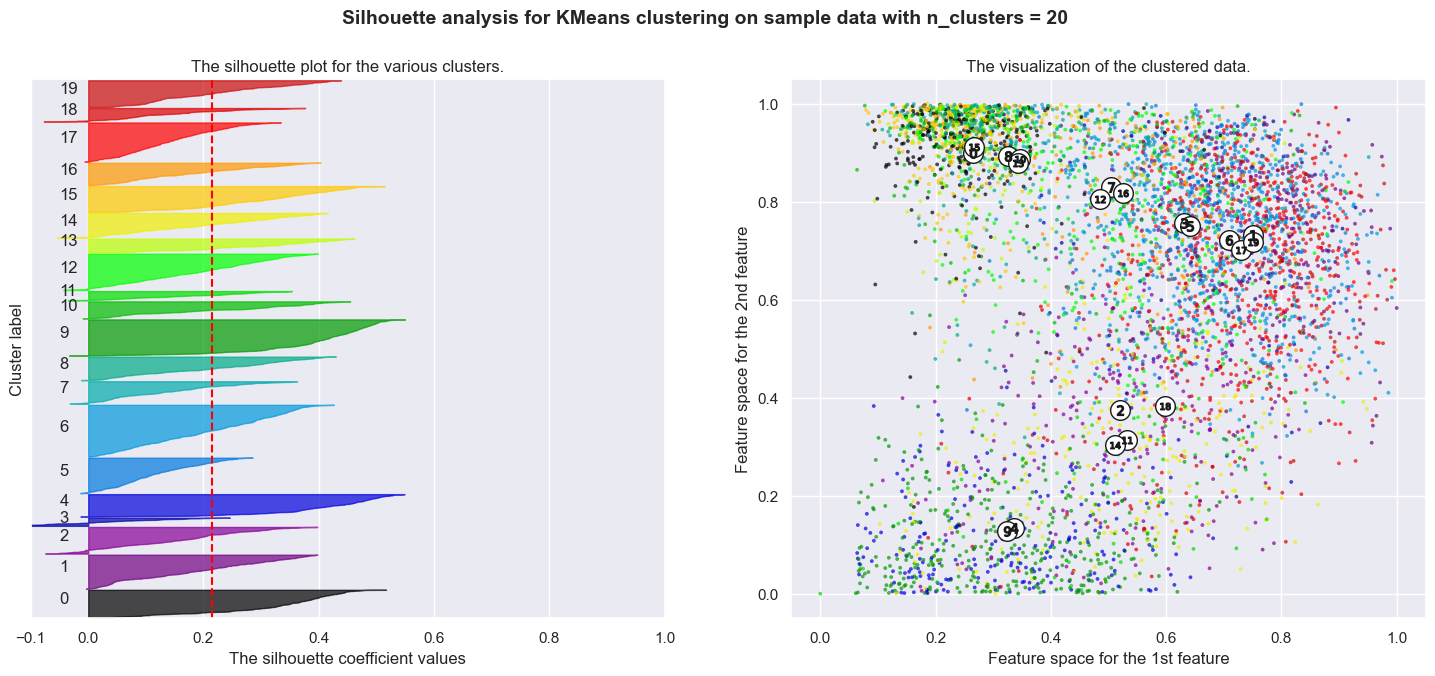

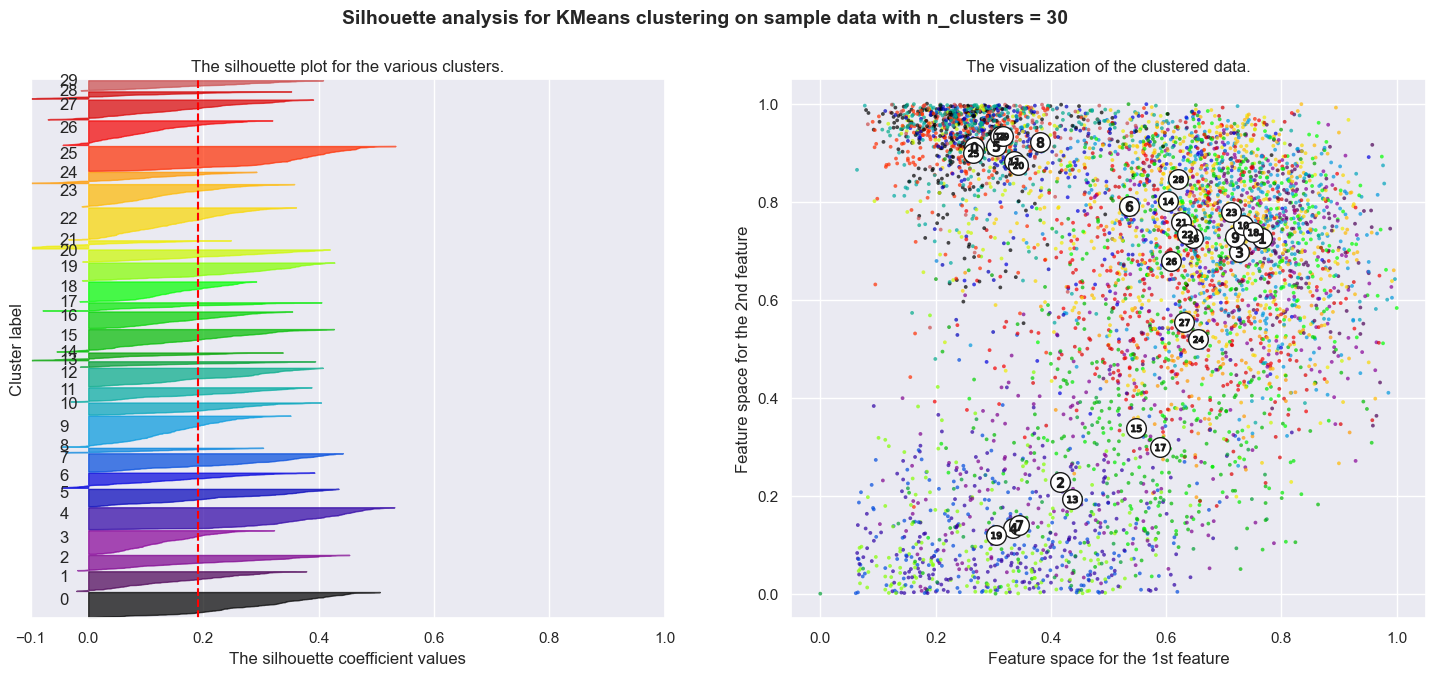

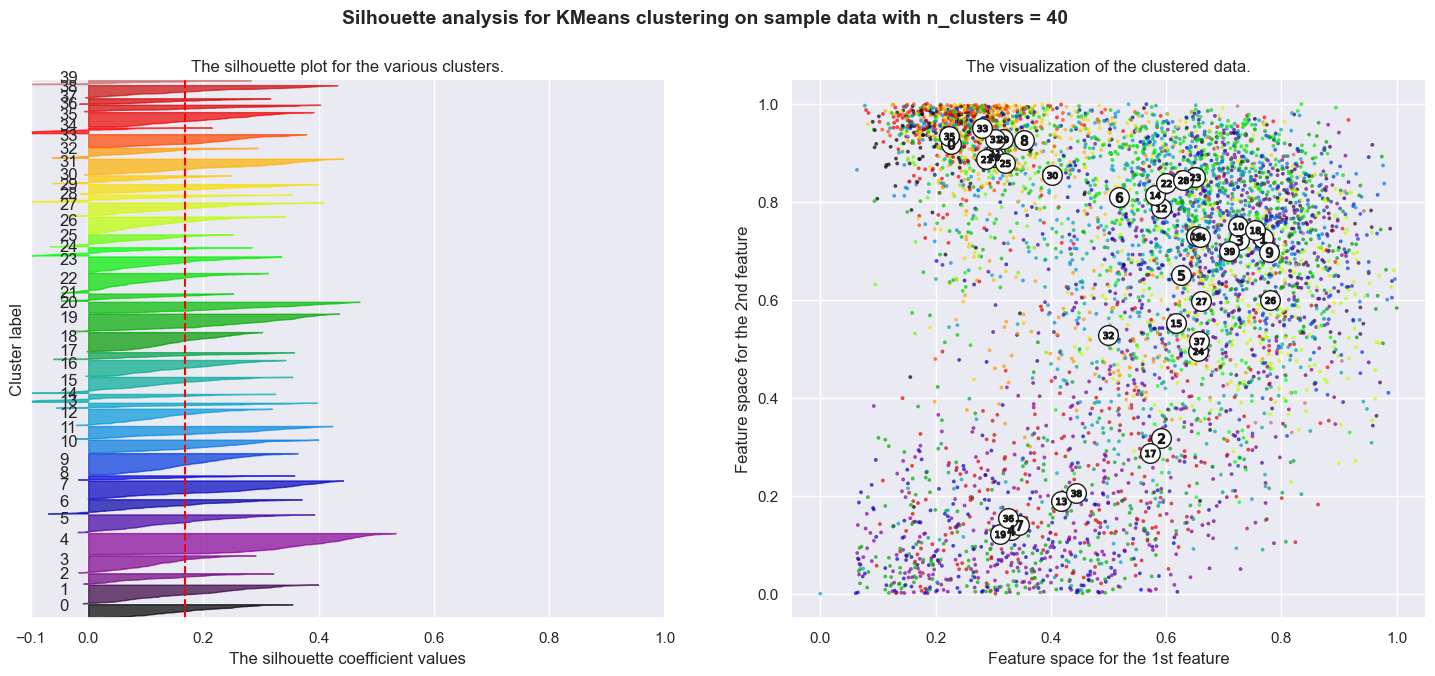

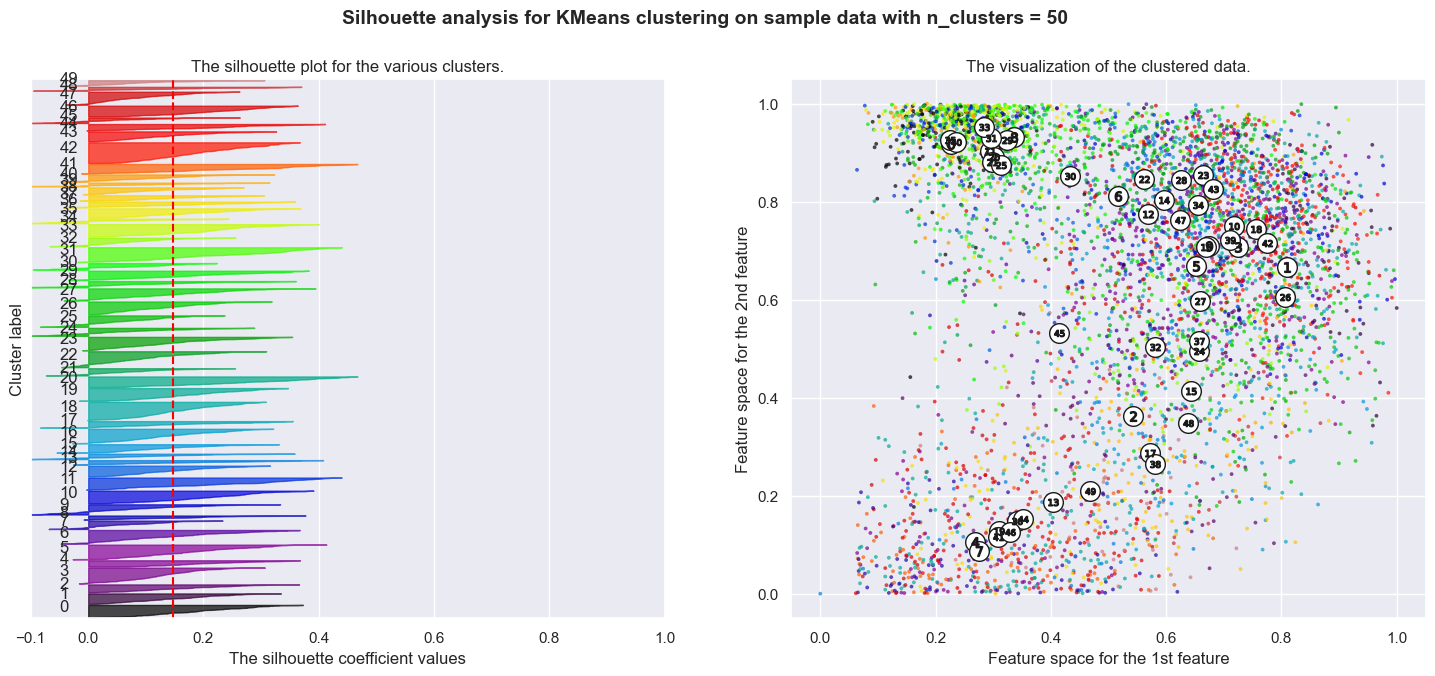

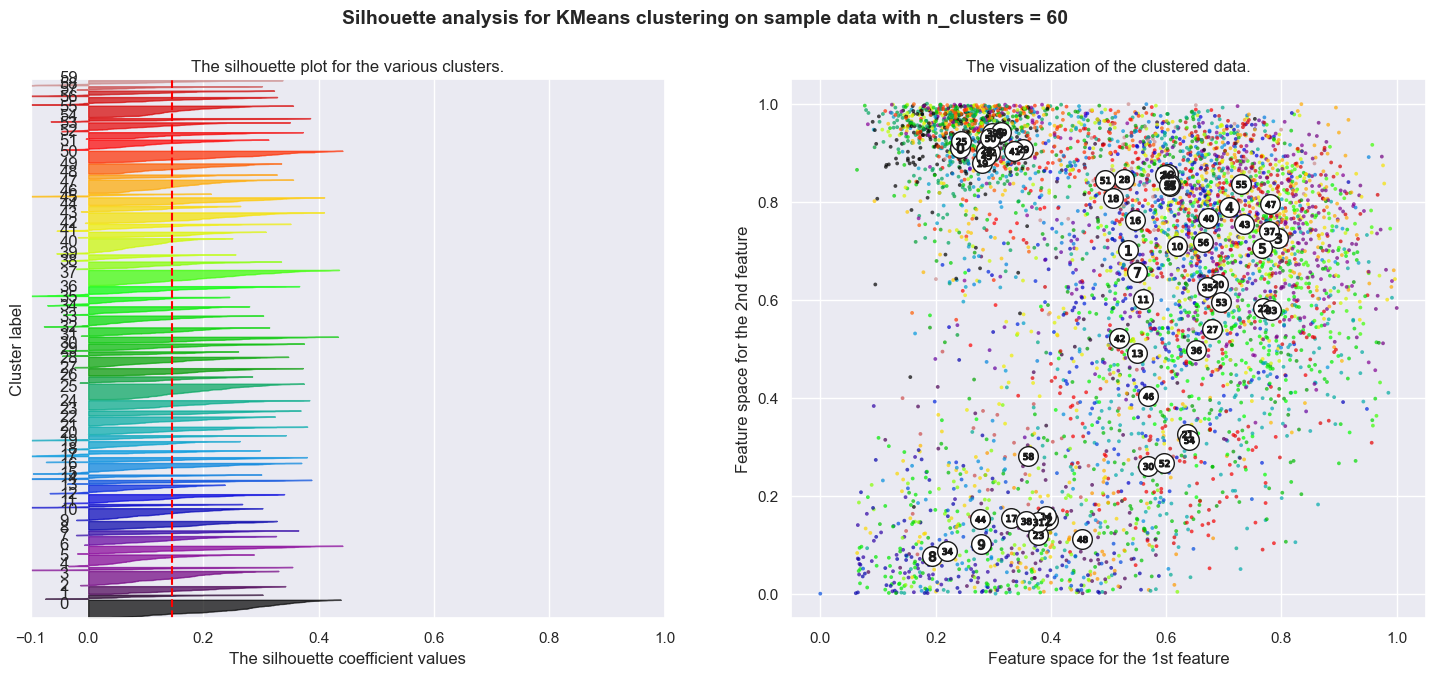

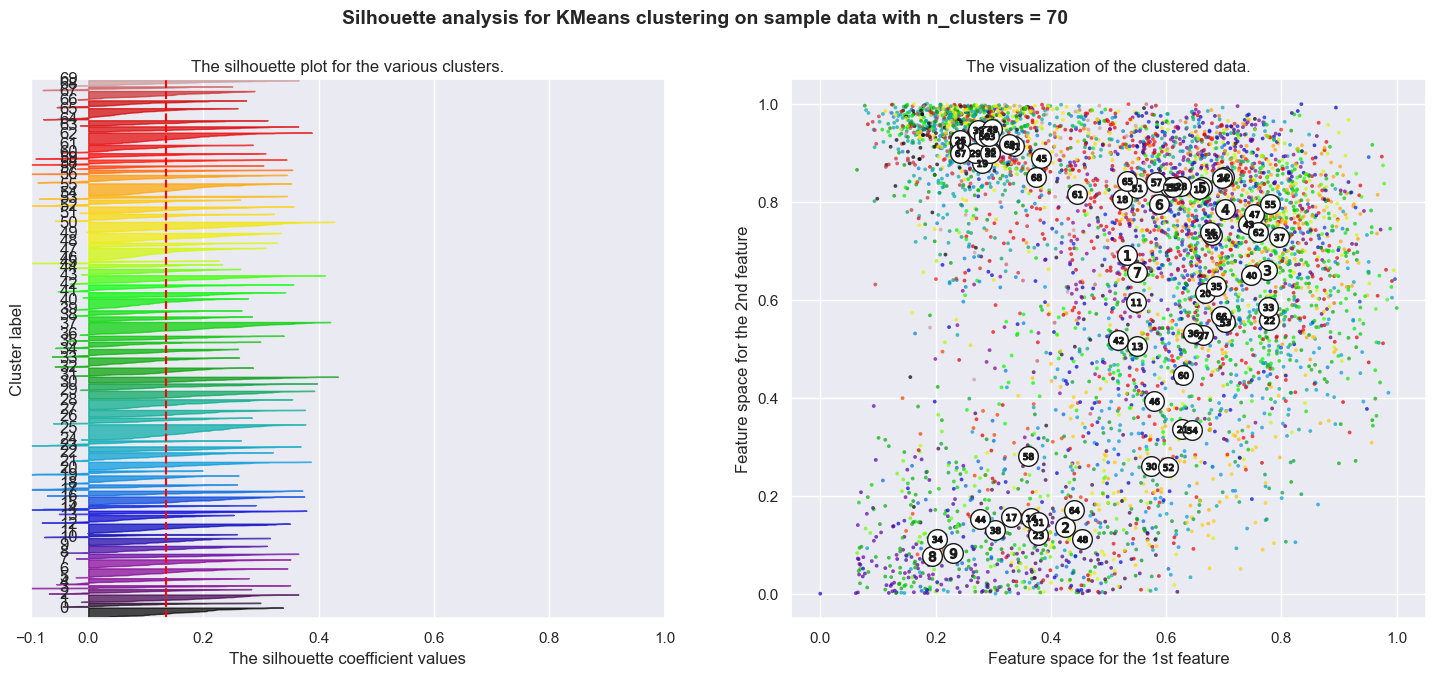

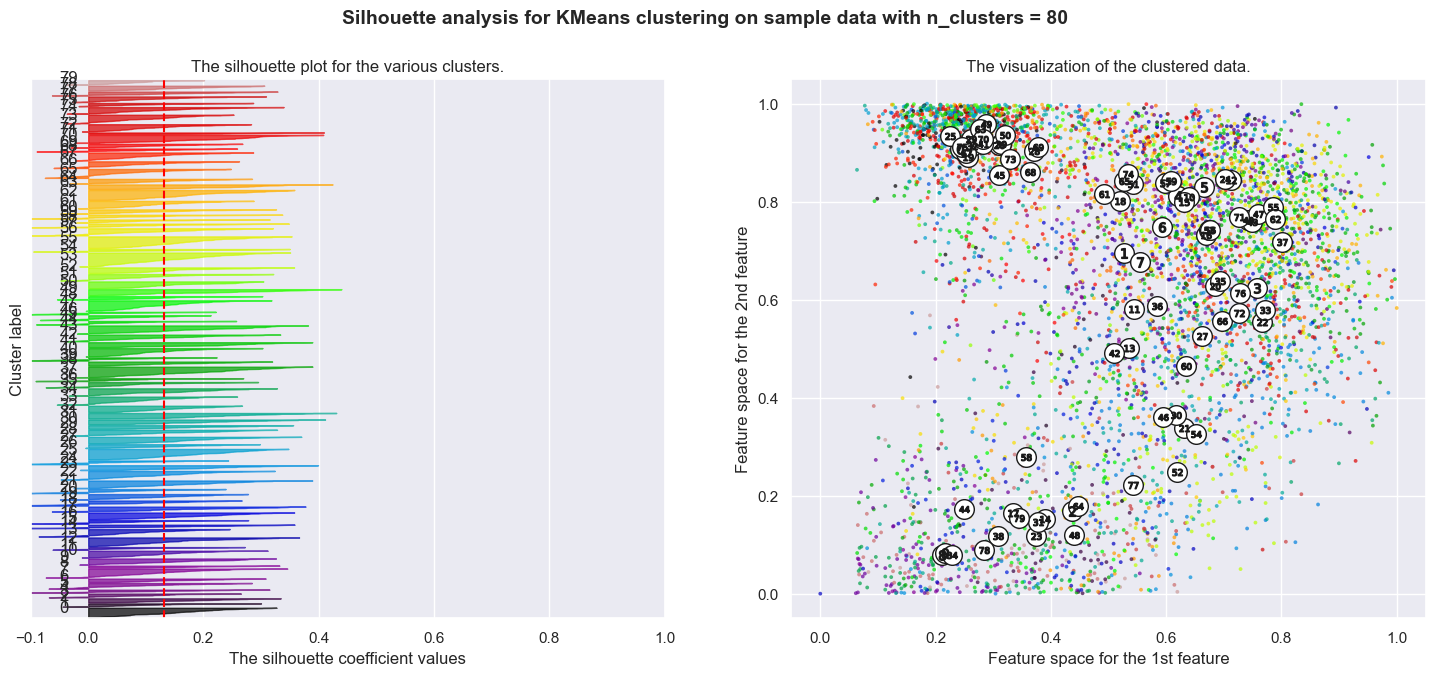

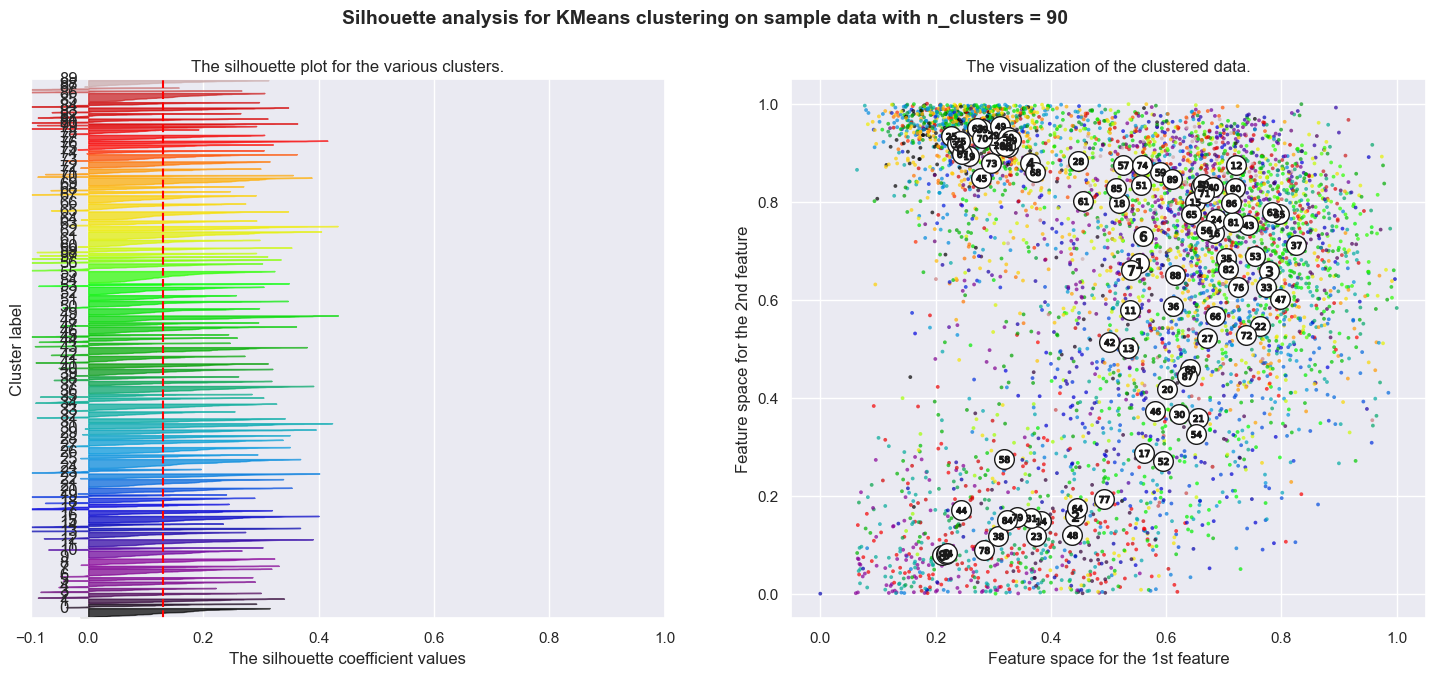

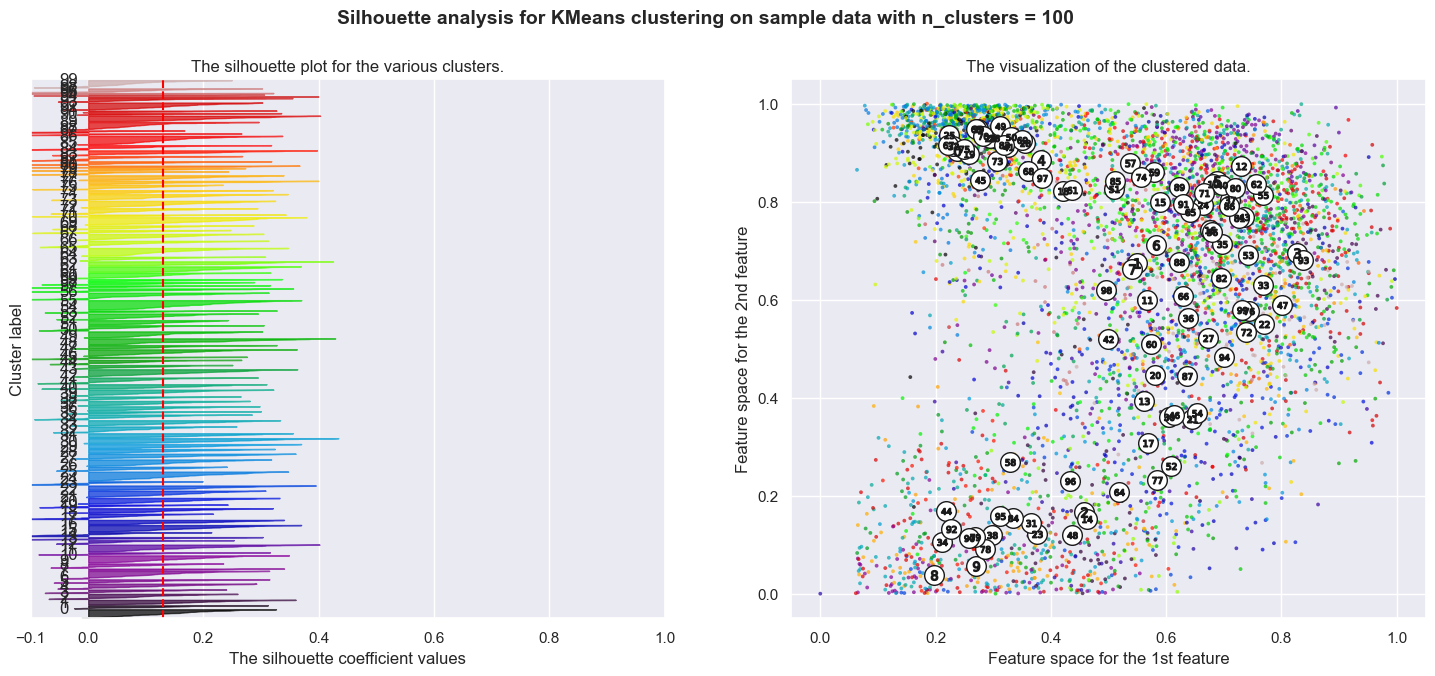

In [24]:
# Clustering graphs using the silhouette score
range_n_clusters = [ 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2) # Create a subplot with 1 row and 2 columns
    fig.set_size_inches(18, 7)
    
    # The 1st subplot is the silhouette plot, the coefficient can range between -1, 1
    ax1.set_xlim([-0.1, 1])

    # The (n_clusters+1)*10 is for inserting blank space between silhouettes, to demarcate them clearly
    ax1.set_ylim([0, len(scaled_features_df) + (n_clusters + 1) * 10])

    # Initialize the cluster with n_clusters value and a random generator, seed of 10 for reproducibility
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_features_df)

    # The silhouette_score gives the average value for all the samples, which gives a 
    # perspective into the density and separation of the formed
    silhouette_avg = silhouette_score(scaled_features_df, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_features_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        scaled_features_df.iloc[:, 0], scaled_features_df.iloc[:, 1], marker=".", 
        s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

#### Based on these findings, we have determined that employing 20 clusters would be suitable for grouping slightly over 5000 songs.

## Clustering with k-means

In [25]:
# Initialise the model
my_kmeans = KMeans(n_clusters= 20, # you always choose the number of k here
                   n_init="auto",
                   random_state = 123) 

# Fit the model to the data
my_kmeans.fit(scaled_features_df)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to our original DataFrame
scaled_features_df["cluster"] = clusters

scaled_features_df.head()

danceability  energy  \
name_artist                                                                
Se Eu Quiser Falar Com Deus                    ...      0.680455  0.2590   
Saudade De Bahia                               ...      0.767322  0.3990   
Canta Canta, Minha Gente                       ...      0.880041  0.7300   
Mulher Eu Sei                                  ...      0.729059  0.0502   
Rosa Morena                                    ...      0.673216  0.1190   

                                                         key  loudness  mode  \
name_artist                                                                    
Se Eu Quiser Falar Com Deus                    ...  1.000000  0.763897   0.0   
Saudade De Bahia                               ...  0.181818  0.771967   1.0   
Canta Canta, Minha Gente                       ...  0.181818  0.798018   1.0   
Mulher Eu Sei                                  ...  0.363636  0.682811   1.0   
Rosa Morena                                    ...  0.545455  0.655228   1.0   

                                                    speechiness  acousticness  \
name_artist                                                                     
Se Eu Quiser Falar Com Deus                    ...     0.076797      0.696787   
Saudade De Bahia                               ...     0.037691      0.217871   
Canta Canta, Minha Gente                       ...     0.377996      0.454819   
Mulher Eu Sei                                  ...     0.051307      0.882530   
Rosa Morena                                    ...     0.041394      0.919679   

                                                    instrumentalness  \
name_artist                                                            
Se Eu Quiser Falar Com Deus                    ...          0.000060   
Saudade De Bahia                               ...          0.000002   
Canta Canta, Minha Gente                       ...          0.000064   
Mulher Eu Sei                                  ...          0.000041   
Rosa Morena                                    ...          0.000348   

                                                    liveness   valence  \
name_artist                                                              
Se Eu Quiser Falar Com Deus                    ...  0.987842  0.310660   
Saudade De Bahia                               ...  0.108409  0.703553   
Canta Canta, Minha Gente                       ...  0.125633  0.918782   
Mulher Eu Sei                                  ...  0.391084  0.531980   
Rosa Morena                                    ...  0.105370  0.408122   

                                                       tempo  duration_ms  \
name_artist                                                                 
Se Eu Quiser Falar Com Deus                    ...  0.515800     0.059067   
Saudade De Bahia                               ...  0.584322     0.042058   
Canta Canta, Minha Gente                       ...  0.437862     0.031590   
Mulher Eu Sei                                  ...  0.499098     0.040567   
Rosa Morena                                    ...  0.565171     0.063684   

                                                    time_signature  cluster  
name_artist                                                                  
Se Eu Quiser Falar Com Deus                    ...             0.8        8  
Saudade De Bahia                               ...             0.8        5  
Canta Canta, Minha Gente                       ...             0.8       12  
Mulher Eu Sei                                  ...             0.8        1  
Rosa Morena                                    ...             0.8       18

In [26]:
clusters = scaled_features_df.groupby('cluster').sample(3)
clusters.head()
# Or to see all clusters with all their songs:
# scaled_features_df[["cluster"]].sort_values(by='cluster')

danceability  energy  \
name_artist                                                                
Uplift                                         ...      0.418821  0.7160   
Devotion (feat. Tony Scott) - Extended Instrume...      0.893485  0.6770   
Bromes                                         ...      0.628749  0.9030   
At Last - Single Version                       ...      0.173733  0.3260   
Tannhäuser, WWV 70 / Act 3: "Allmächt'ge Jungfr...      0.168563  0.0802   

                                                         key  loudness  mode  \
name_artist                                                                    
Uplift                                         ...  0.363636  0.768332   1.0   
Devotion (feat. Tony Scott) - Extended Instrume...  0.090909  0.854912   1.0   
Bromes                                         ...  0.181818  0.899791   1.0   
At Last - Single Version                       ...  0.454545  0.815412   1.0   
Tannhäuser, WWV 70 / Act 3: "Allmächt'ge Jungfr...  0.545455  0.673144   1.0   

                                                    speechiness  acousticness  \
name_artist                                                                     
Uplift                                         ...     0.032135      0.033635   
Devotion (feat. Tony Scott) - Extended Instrume...     0.077015      0.001888   
Bromes                                         ...     0.168845      0.011446   
At Last - Single Version                       ...     0.035294      0.723896   
Tannhäuser, WWV 70 / Act 3: "Allmächt'ge Jungfr...     0.056645      0.994980   

                                                    instrumentalness  \
name_artist                                                            
Uplift                                         ...          0.546193   
Devotion (feat. Tony Scott) - Extended Instrume...          0.838579   
Bromes                                         ...          0.798985   
At Last - Single Version                       ...          0.000609   
Tannhäuser, WWV 70 / Act 3: "Allmächt'ge Jungfr...          0.000508   

                                                    liveness   valence  \
name_artist                                                              
Uplift                                         ...  0.189463  0.755330   
Devotion (feat. Tony Scott) - Extended Instrume...  0.488349  0.322843   
Bromes                                         ...  0.205674  0.532995   
At Last - Single Version                       ...  0.320162  0.326904   
Tannhäuser, WWV 70 / Act 3: "Allmächt'ge Jungfr...  0.086322  0.030863   

                                                       tempo  duration_ms  \
name_artist                                                                 
Uplift                                         ...  0.650694     0.084599   
Devotion (feat. Tony Scott) - Extended Instrume...  0.588925     0.101836   
Bromes                                         ...  0.682952     0.033310   
At Last - Single Version                       ...  0.816833     0.039556   
Tannhäuser, WWV 70 / Act 3: "Allmächt'ge Jungfr...  0.829048     0.111188   

                                                    time_signature  cluster  
name_artist                                                                  
Uplift                                         ...             0.8        0  
Devotion (feat. Tony Scott) - Extended Instrume...             0.8        0  
Bromes                                         ...             0.8        0  
At Last - Single Version                       ...             0.6        1  
Tannhäuser, WWV 70 / Act 3: "Allmächt'ge Jungfr...             0.6        1

##### With the following code, we can visualize all the clusters and their components, but I will only display here the heads of the first 4 clusters.

In [27]:
# Filter the DataFrame for songs belonging to cluster 1
cluster_0 = scaled_features_df[scaled_features_df['cluster'] == 0][['cluster']]
cluster_0.head()

cluster
name_artist                                                
Nova Bossa Nova                                ...        0
Blue Bossa                                     ...        0
Bossa Dorado                                   ...        0
Baião Destemperado                             ...        0
Pobre e Rico                                   ...        0

In [28]:
# Filter the DataFrame for songs belonging to cluster 1
cluster_1 = scaled_features_df[scaled_features_df['cluster'] == 1][['cluster']]
cluster_1.head()

cluster
name_artist                                                
Mulher Eu Sei                                  ...        1
Desafinado                                     ...        1
A Força Que Nunca Seca (feat. Maria Bethânia)  ...        1
Águas De Março                                 ...        1
Brigas, Nunca Mais                             ...        1

In [29]:
# Filter the DataFrame for songs belonging to cluster 1
cluster_2 = scaled_features_df[scaled_features_df['cluster'] == 2][['cluster']]
cluster_2.head()

cluster
name_artist                                                
Devil Or Angel                                 ...        2
Lust For Life                                  ...        2
BORN FREE                                      ...        2
Eventually                                     ...        2
Youngblood                                     ...        2

In [30]:
# Filter the DataFrame for songs belonging to cluster 1
cluster_3 = scaled_features_df[scaled_features_df['cluster'] == 3][['cluster']]
cluster_3.head()

cluster
name_artist                                                
Brigas Nunca Mais                              ...        3
Parabens                                       ...        3
Orange Afternoon                               ...        3
Agua De Beber                                  ...        3
Magalenha                                      ...        3

### Cluster analysis - The Euclidean distance between the centroids

In [31]:
# Find the coordinates of each centroid using the cluster_centers_ attribute
centroids = my_kmeans.cluster_centers_

# Calculate the Euclidean distance between the centroids with NumPy 
centroid_distances = np.linalg.norm(centroids[:, np.newaxis] - centroids, axis=2)

# Calculate the Euclidean distance between the centroids with scikit-learn  
# centroid_distances = pairwise_distances(centroids)
# Both methods are effective for calculating the Euclidean distance between centroids, 
# but the first is a little more detailed and can be more versatile in some cases. 
# However, in many scenarios, the practical difference between the results produced by 
# both methods may be minimal.

print("Distâncias Euclidianas entre os centróides:")
print(centroid_distances)

Distâncias Euclidianas entre os centróides:
[[0.         1.15703674 1.35946296 0.81725316 1.21664084 0.77660621
  1.2730265  1.56231024 1.45234933 0.89229331 1.23346394 1.31532569
  0.86173268 0.64228161 1.25943632 0.8308525  1.33199547 0.68827539
  1.0992348  1.12197117]
 [1.15703674 0.         1.54729969 1.06643566 0.9330852  0.9599867
  1.34845122 1.3890095  1.05428512 1.13747668 1.75979969 1.51643283
  0.66692214 1.31950921 1.37805402 0.96020418 1.51134693 1.41071513
  0.60578106 1.62895935]
 [1.35946296 1.54729969 0.         1.15977593 1.8144094  1.33135162
  0.58857783 1.48125454 1.01100834 1.00186557 0.73772401 0.61094174
  1.41664272 1.42260038 0.81569902 1.17668629 0.57714667 1.25362762
  1.35511208 0.88713091]
 [0.81725316 1.06643566 1.15977593 0.         1.53067151 0.60579018
  1.1845953  1.80271083 1.30014923 0.57074988 1.41494035 1.13603631
  0.64436787 1.22103035 1.08905116 0.77589795 1.01207561 1.05554864
  0.7709671  1.47481242]
 [1.21664084 0.9330852  1.8144094  1.5306

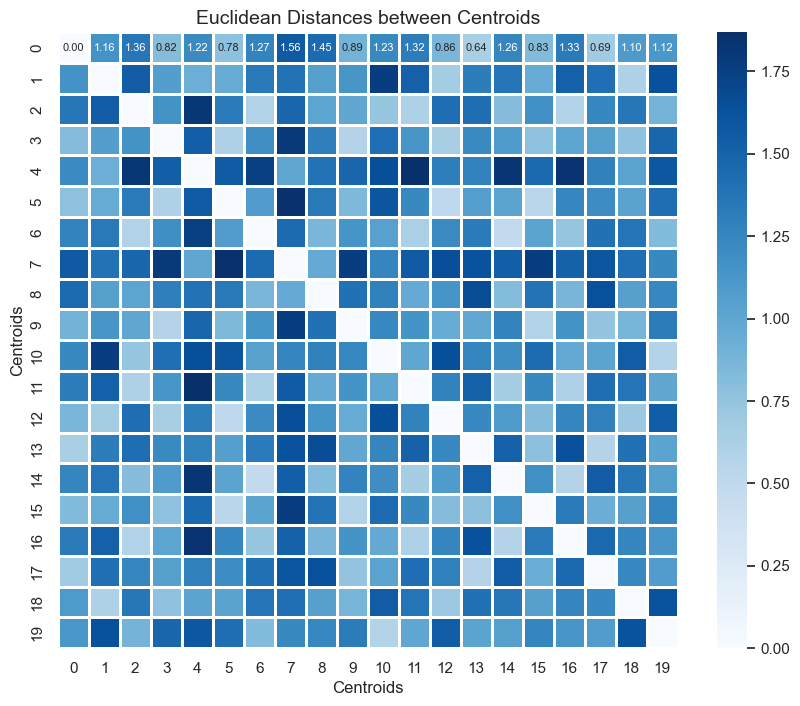

In [32]:
# Plot distances on heatmap
plt.figure(figsize=(10, 8))  
sns.heatmap(centroid_distances,
            annot=True,
            linewidths=1,
            cmap='Blues',  
            fmt='.2f',
            annot_kws={"size": 8})  # Adjusting the font size of numbers within the graph

# Adiciona título e rótulos aos eixos
plt.title('Euclidean Distances between Centroids', fontsize=14) 
plt.xlabel('Centroids', fontsize=12)
plt.ylabel('Centroids', fontsize=12) 
plt.show()

### Radar chart of mean music preferences by cluster

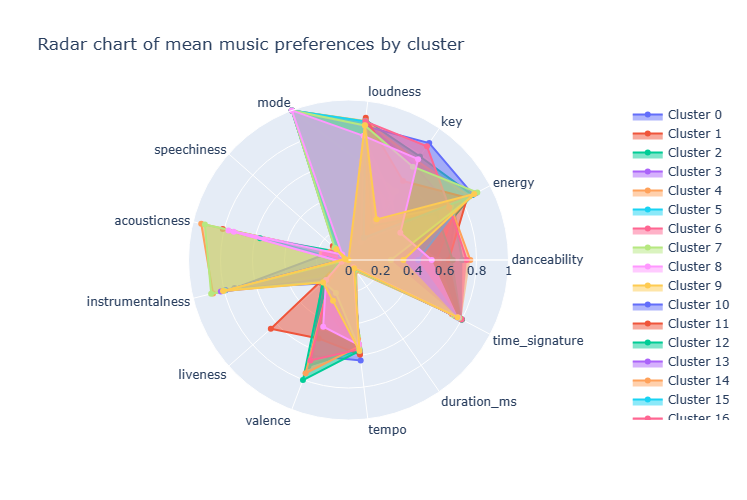

In [33]:
# State the label for each arm of the chart
categories = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
              'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

# Create an empty list to store the objects
trace_objects = []

# Iterate over the unique cluster numbers and add an object for each cluster to the list
for cluster in sorted(scaled_features_df['cluster'].unique()):
  cluster_food_means = go.Scatterpolar(
    r=[scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'danceability'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'energy'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'key'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'loudness'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'mode'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'speechiness'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'acousticness'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'instrumentalness'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'liveness'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'valence'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'tempo'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'duration_ms'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'time_signature'].mean()],
    theta=categories,
    fill='toself',
    name=f'Cluster {cluster}'
  )
  trace_objects.append(cluster_food_means)    
# Create a figure
fig = go.Figure()

# Add traces to the figure
fig.add_traces(trace_objects)

# Update layout
fig.update_layout(
  title_text='Radar chart of mean music preferences by cluster',
  height=500,
  width=700,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )
  ),
  showlegend=True
)

# Show the plot
fig.show()

# Import clusters to Spotify with spotipy API

In [ ]:
!import spotipy
!import pickle
!from spotipy.oauth2 import SpotifyOAuth

In [ ]:
scope = 'YOUR_SCOPE'
username = 'YOUR_USER_NAME'
redirectUri = 'URI_MUST_MATCH_THAT_SET_IN_APP_CREATION'
client_id = 'YOUR_APPS_CLIENT_ID'
client_secret = 'YOUR_APP_CLIENT_SECRET'

token = SpotifyOAuth(scope=scope,
                     username=username,
                     client_id=client_id,
                     client_secret=client_secret,
                     redirect_uri=redirectUri,
                     #open_browser=False # this line is need in Colab, but not on local machine
                     )
spotifyObject = spotipy.Spotify(auth_manager = token)

playlist_collection = {}
for i in range(n_clusters):  # This range must match the number of clusters
    playlist_name = f'my_playlist_cluster_{i}'  # Here, we will create simple playlist names indicating which cluster created the playlist
    playlist_description= 'this is a test list'
    playlist_id = spotifyObject.user_playlist_create(user=username,
                                                     name=playlist_name,
                                                     public=True,
                                                     description=playlist_description)['id']
    id_list = list(songs_df.loc[songs_df["cluster"] == i]
                            .sample(5)  # Here, we simply take 5 songs randomly from each cluster
                            .id
                   )
    # Spotify needs cetain text wrappers around ID numbers to identify the target as a track, a playlist, etc.
    uris = [f'spotify:track:{str(id).strip()}' for id in id_list]
    spotifyObject.user_playlist_add_tracks(user=username,playlist_id=playlist_id,tracks=uris)
    playlist_collection[playlist_name] = playlist_id

# Playlist IDs can be saved for later
with open("./playlists.pkl", "wb") as f:
    pickle.dump(playlist_collection, f)

# This step is only needed in Google Colab
from google.colab import files
files.download("./playlists.pkl")
token = SpotifyOAuth(scope=scope,
                     username=username,
                     client_id=client_id,
                     client_secret=client_secret,
                     redirect_uri=redirectUri,
                     open_browser=False # this line is need in Colab, but not on local machine
                     )
spotifyObject = spotipy.Spotify(auth_manager = token)
with open("./playlists.pkl", "rb") as f:
    playlist_collection = pickle.load(f)
uris = [f'spotify:track:{str(id).strip()}' for id in songs_df.sample(10).id]
playlist_id = playlist_collection["my_playlist_cluster_0"] # We now replace the 5 songs in playlist 0 with 10 different songs
spotifyObject.user_playlist_replace_tracks(user=username, playlist_id=playlist_id, tracks=uris)